In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file="C:\\Users\\KARTHIKAMATH\\Downloads\\object dectection\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="C:\\Users\\KARTHIKAMATH\\Downloads\\object dectection\\frozen_inference_graph.pb"

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [6]:
classLabels=[]
file_name="C:\\Users\\KARTHIKAMATH\\Downloads\\object dectection\\labels.txt"
with open(file_name,'rt') as fpt:
     classLabels = fpt.read().rstrip('\n').split('\n')
        

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [16]:
img= cv2.imread("C:\\Users\\KARTHIKAMATH\\Downloads\\object dectection\\isaac-newton-gettyimages-56458980.jpg")

In [17]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 000002794E63EC30>

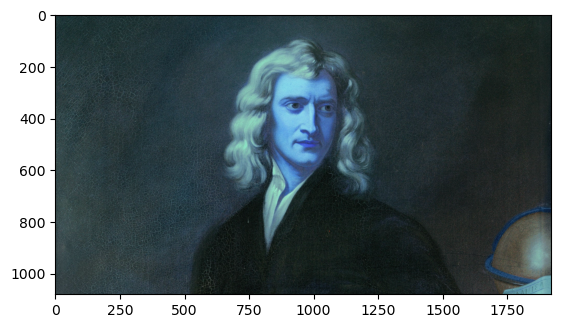

In [18]:
plt.imshow(img)

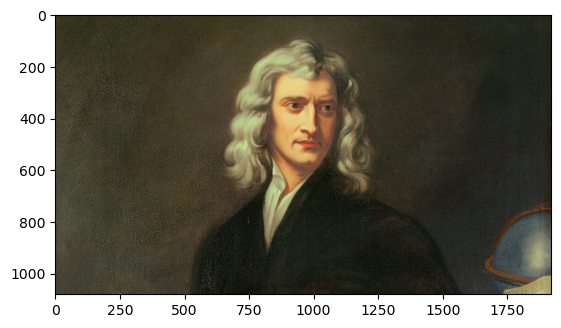

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
ClassIndex, confidence, bbox=model.detect(img,confThreshold=0.5)

In [21]:
print(ClassIndex)

[1]


In [22]:
font_scale=3
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

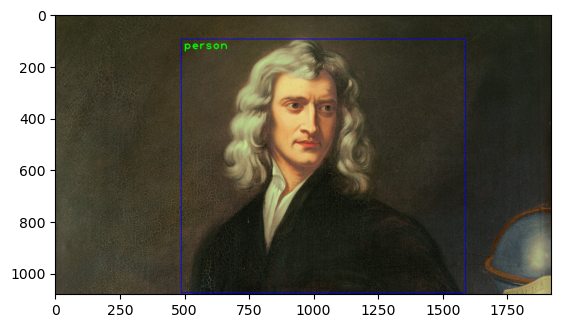

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video object detection

In [ ]:
import cv2
cap = cv2.VideoCapture("C:\\Users\\KARTHIKAMATH\\Downloads\\object dectection\\WhatsApp Video 2024-05-02 at 9.25.55 PM.mp4")
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

print(ClassIndex)
if(len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
        if (ClassInd <= 80):
            cv2.rectangle(frame,boxes,(255,0,0),2)
            cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
         
    cv2.imshow("object dectection",frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    


# using WebCam

In [ ]:
import cv2
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

print(ClassIndex)
if(len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
        if (ClassInd <= 80):
            cv2.rectangle(frame,boxes,(255,0,0),2)
            cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
         
    cv2.imshow("object dectection",frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    